Saving H1N1 CASES.csv to H1N1 CASES.csv
Column names in the dataset: Index(['200923', '1'], dtype='object')


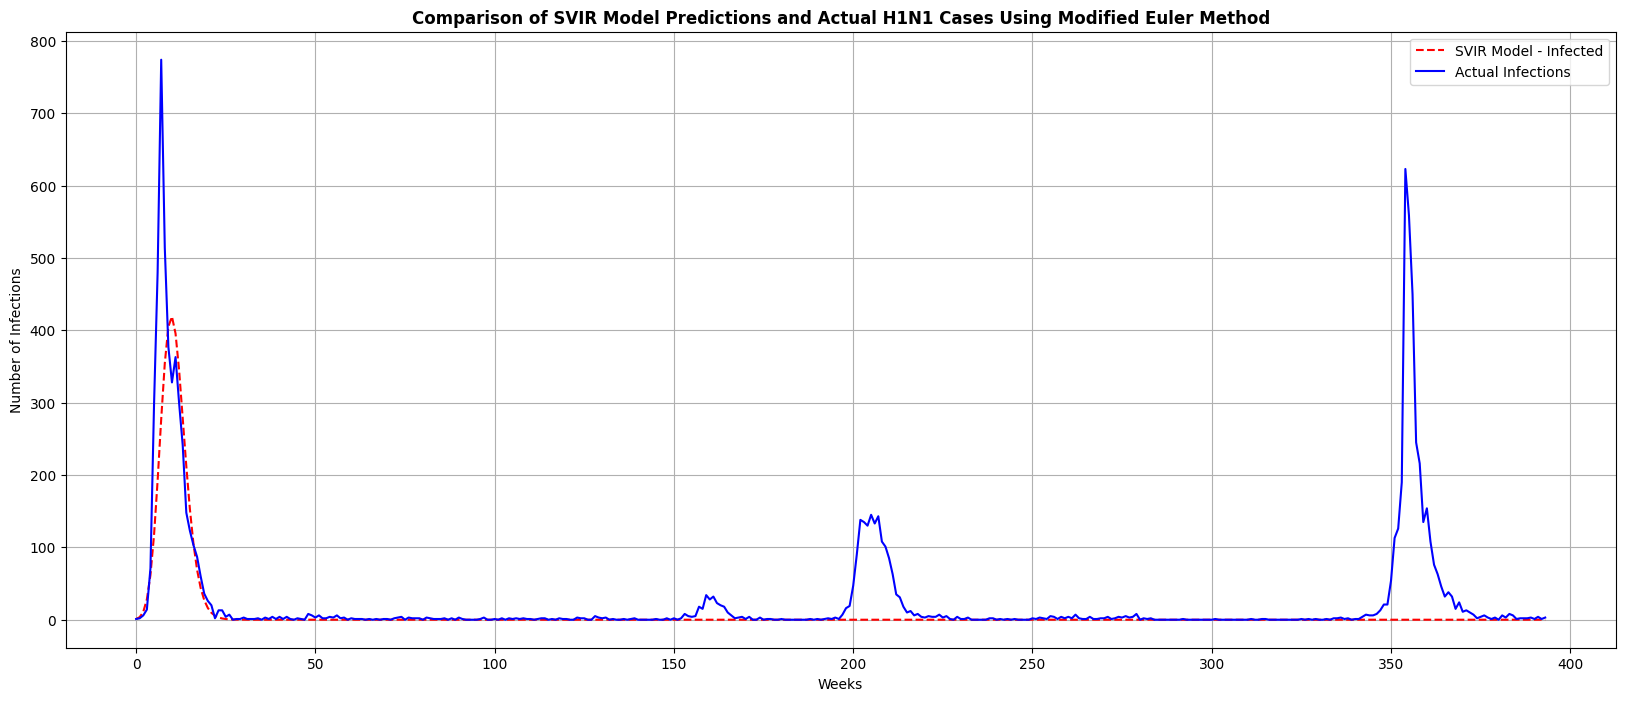

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload and read the dataset
uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_csv(filename)

# Print the actual column names
print("Column names in the dataset:", data.columns)

# Constants for the SVIR model
r = 1.17  # Natural recovery rate
N = 42075716  # Total population
gamma = 0.003  # Immunity loss rate
mu = 0.00025  # Death rate
m = 0.0006298  # Birth rate
beta = 2.8  # Infection rate
v = 0.108  # Vaccination rate
xi = 0.3  # Infection rate among vaccinated

# Initial conditions
S0 = N - 1  # All are susceptible except one infected
V0 = 0      # No one is vaccinated initially
I0 = 1      # One initial infected individual
R0 = 0      # No one recovered initially

# Assuming the second column has the infection data and is properly named '1'
actual_infections = data['1'].values
T = len(actual_infections) - 1  # Adjust simulation length to match data length

# Time steps
dt = 1  # One week per time step

# Modified Euler Method Implementation
def modified_euler_method(f, x0, T, dt):
    n_steps = int(T / dt)
    x = np.zeros((n_steps + 1, 4))
    x[0] = x0
    for i in range(n_steps):
        k1 = f(x[i])
        k2 = f(x[i] + dt * k1)
        x[i + 1] = x[i] + (dt / 2) * (k1 + k2)
    return x

# SVIR model differential equations
def svir_model(x):
    S, V, I, R = x
    dSdt = m * N - beta * S * I / N + gamma * R - v * S - mu * S
    dVdt = v * S - xi * V * I / N - mu * V
    dIdt = beta * S * I / N + xi * V * I / N - r * I - mu * I
    dRdt = r * I - gamma * R - mu * R
    return np.array([dSdt, dVdt, dIdt, dRdt])

# Simulate the model using Modified Euler's Method
initial_conditions = [S0, V0, I0, R0]
result = modified_euler_method(svir_model, initial_conditions, T, dt)

# Plotting the results
time = np.arange(0, T + 1)
plt.figure(figsize=(20, 8))
plt.plot(time, result[:, 2], label='SVIR Model - Infected', color='red', linestyle='--')
plt.plot(time, actual_infections, label='Actual Infections', color='blue', linestyle='-')
plt.xlabel('Weeks')
plt.ylabel('Number of Infections')

plt.grid(True)
plt.title('Comparison of SVIR Model Predictions and Actual H1N1 Cases Using Modified Euler Method', fontweight='bold', fontsize='12')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Determine the split point for 80% training and 20% testing
split_index = int(0.8 * len(actual_infections))

# Training data
train_actual_infections = actual_infections[:split_index]
train_predicted_infections = result[:split_index, 2]  # Assuming the third column is the infected compartment

# Testing data
test_actual_infections = actual_infections[split_index:]
test_predicted_infections = result[split_index:, 2]

# Calculate MAE for the training set
mae_train = mean_absolute_error(train_actual_infections, train_predicted_infections)

# Calculate MAE for the testing set
mae_test = mean_absolute_error(test_actual_infections, test_predicted_infections)

# Print results
print("Training Mean Absolute Error (MAE):", mae_train)
print("Testing Mean Absolute Error (MAE):", mae_test)


Training Mean Absolute Error (MAE): 11.569471106960396
Testing Mean Absolute Error (MAE): 44.35443037974684
